In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [18]:
def plot(type):
    timings=pd.read_csv(type+"timingstoolbox.csv").to_dict(orient='list') | pd.read_csv(type+"timingsmadupite.csv").to_dict(orient='list')
    timings.pop("Unnamed: 0")
    # Residual of GS does not converge
    # timings.pop("GS")
    # timings.pop("GSSparse")
    if type=='sparse':
        timings.pop('PIModified')
        timings.pop('PI')
        timings.pop('VI')
        timings['OPI, sparse']=timings.pop('PIModifiedsparse')
        timings['PI, sparse']=timings.pop('PIsparse')
        timings['VI, sparse']=timings.pop('VIsparse')
        timings['madupite (single core)']=timings.pop('madupite')
        reps=10
        runs=12
        k=1
    elif type=='dense':
        k=3
        reps=10
        runs=10
        timings['OPI']=timings.pop('PIModified')

        timings['madupite (single core)']=timings.pop('madupitestd')
        timings = timings | pd.read_csv(type+"timingsmadupite4.csv").to_dict(orient='list')
        timings.pop("Unnamed: 0")
        timings['madupite (four cores)']=timings.pop('madupitestd')
        timings.pop('madupiteexact')

    fig, ax1 = plt.subplots()
    keys = list(timings.keys())
    keys.sort()
    for key in keys:
        x = [2 ** (i + k) for i in range(runs)]
        y = np.array(timings[key]).reshape(runs, reps)
        ax1.plot(x, np.mean(y, axis=1), label=key)
        ax1.fill_between(x, np.min(y, axis=1), np.max(y, axis=1), alpha=0.5)
    ax1.legend(loc=4)
    ax1.set_xlabel("Number of states")
    ax1.set_ylabel("Execution time in seconds")
    ax1.set_xticks([i for i in range(0,4001,500)], [str(i) for i in range(0,4001,500)])
    ax1.set_yscale("log")
    fig.savefig("Benchmarkpymdptoolbox"+type+".png",dpi=1000)



['OPI, sparse', 'PI, sparse', 'VI, sparse', 'madupite (single core)']


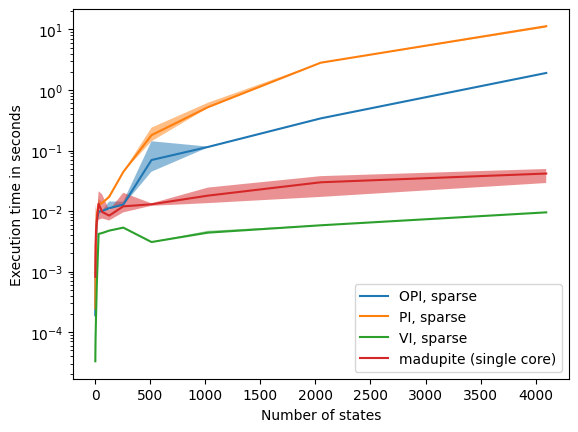

In [19]:
plot("sparse")

['OPI', 'PI', 'VI', 'madupite (four cores)', 'madupite (single core)']


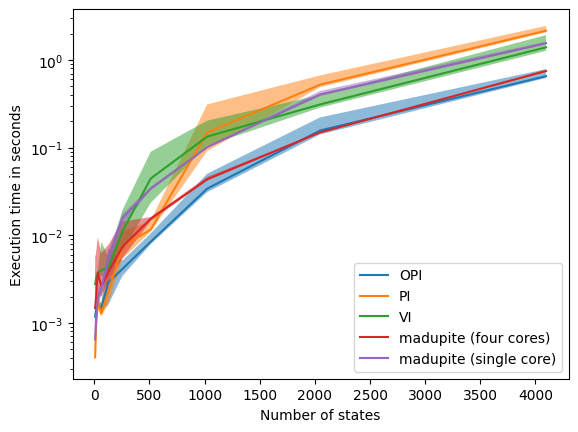

In [20]:
plot('dense')